In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from glob import glob

## Part 1 - Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

In [2]:
images = glob('camera_cal/calibration*.jpg')

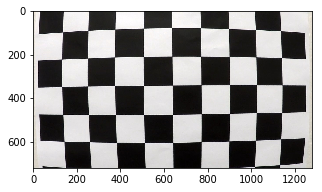

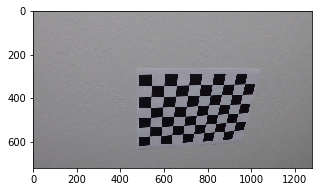

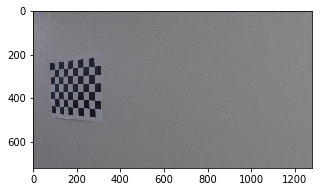

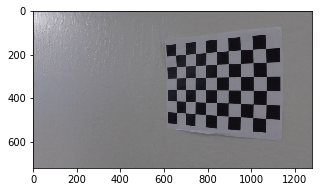

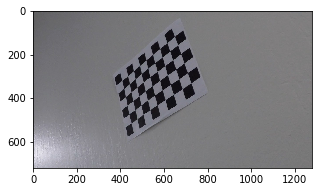

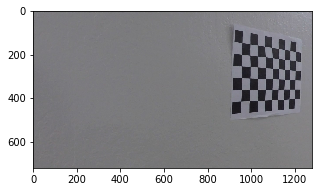

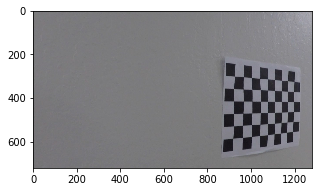

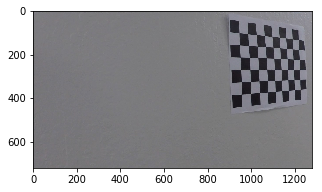

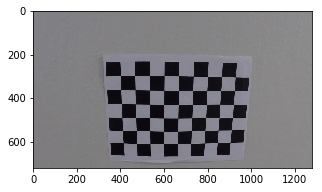

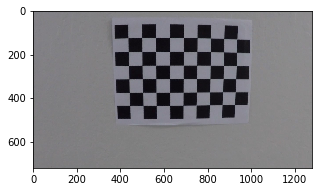

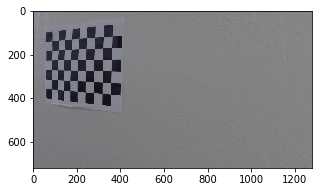

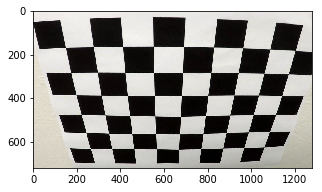

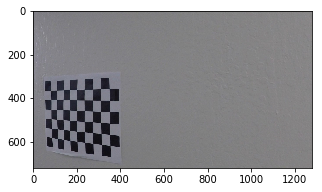

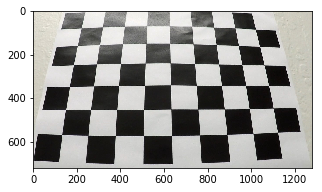

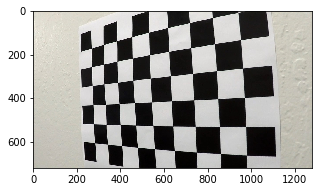

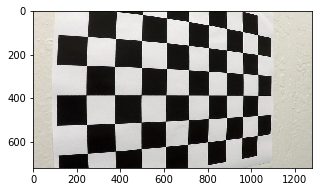

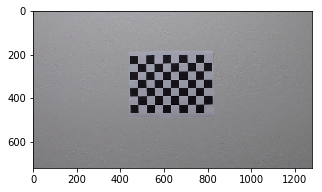

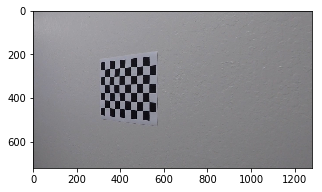

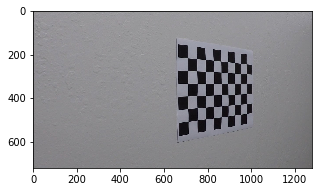

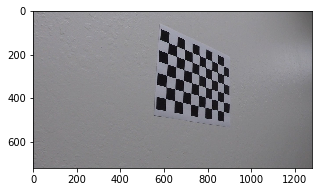

In [3]:
for i in range(len(images)):
    plt.figure(figsize=(5,5))
    img = mpimg.imread(images[i])
    plt.imshow(img)
plt.show()

In [4]:
def cameraCalibrationDistortion(images):
    
    obj = np.zeros((6*9, 3), np.float32)
    obj[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

    objpoints = []
    imgpoints = []
    
    for name in images:
        img = mpimg.imread(name)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret==True:
            imgpoints.append(corners)
            objpoints.append(obj)

            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    return cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

In [5]:
ret, mtx, dist, rvecs, tvecs = cameraCalibrationDistortion(images)

## Part 2 : Apply distortion correction to raw images.

In [6]:
def distortionCorrection(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [7]:
img = mpimg.imread('camera_cal/calibration2.jpg')
dst = distortionCorrection(img, mtx, dist)

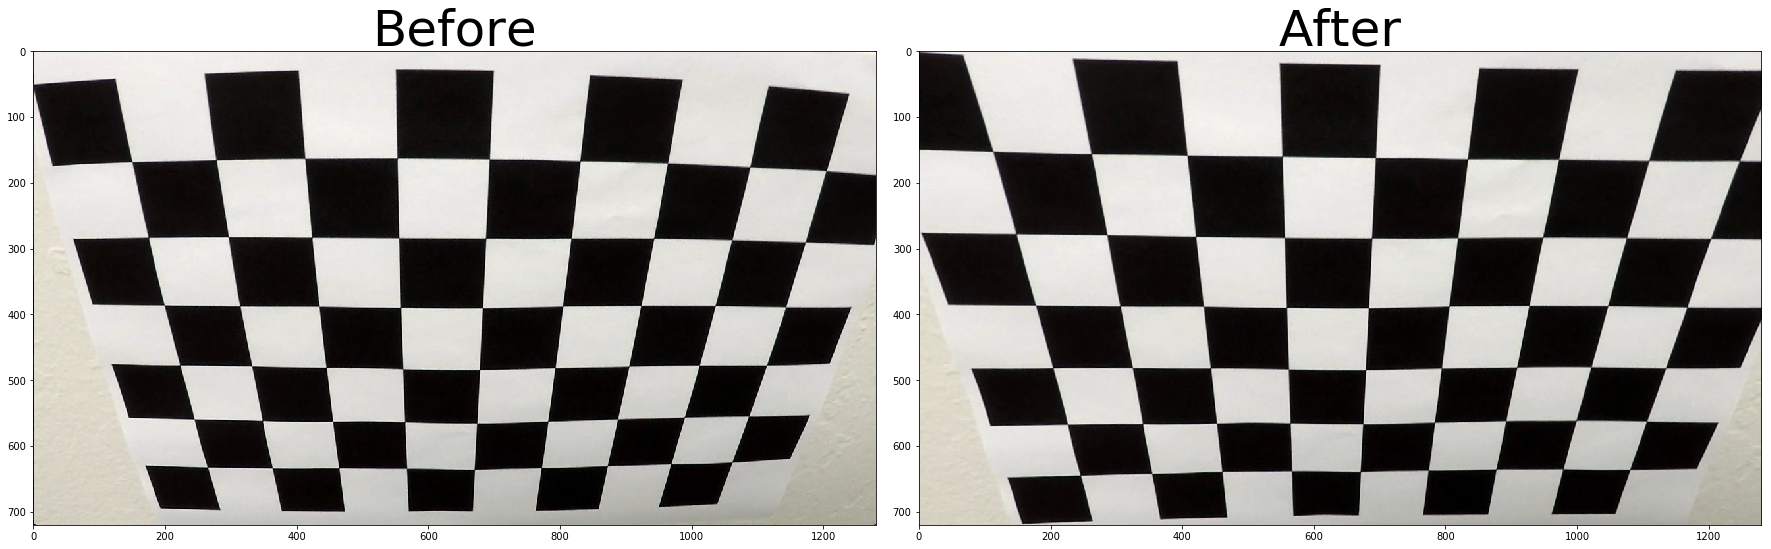

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Before', fontsize=50)
ax2.imshow(dst)
ax2.set_title('After', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Part 3 : Use color transforms, gradients, etc., to create a thresholded binary image.

In [186]:
def pipeline(img, s_thresh=(150, 255), l_thresh = (120, 255), sx_thresh=(20, 100)):
    # Convert to HLS color space 
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    r = img[:,:,0]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    color_binary = np.zeros_like(s_channel)
    color_binary[np.logical_xor((s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1]) & 
                               (r >= l_thresh[0]) & (r <= l_thresh[1]), 
                 (scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1]))] = 1
    return color_binary

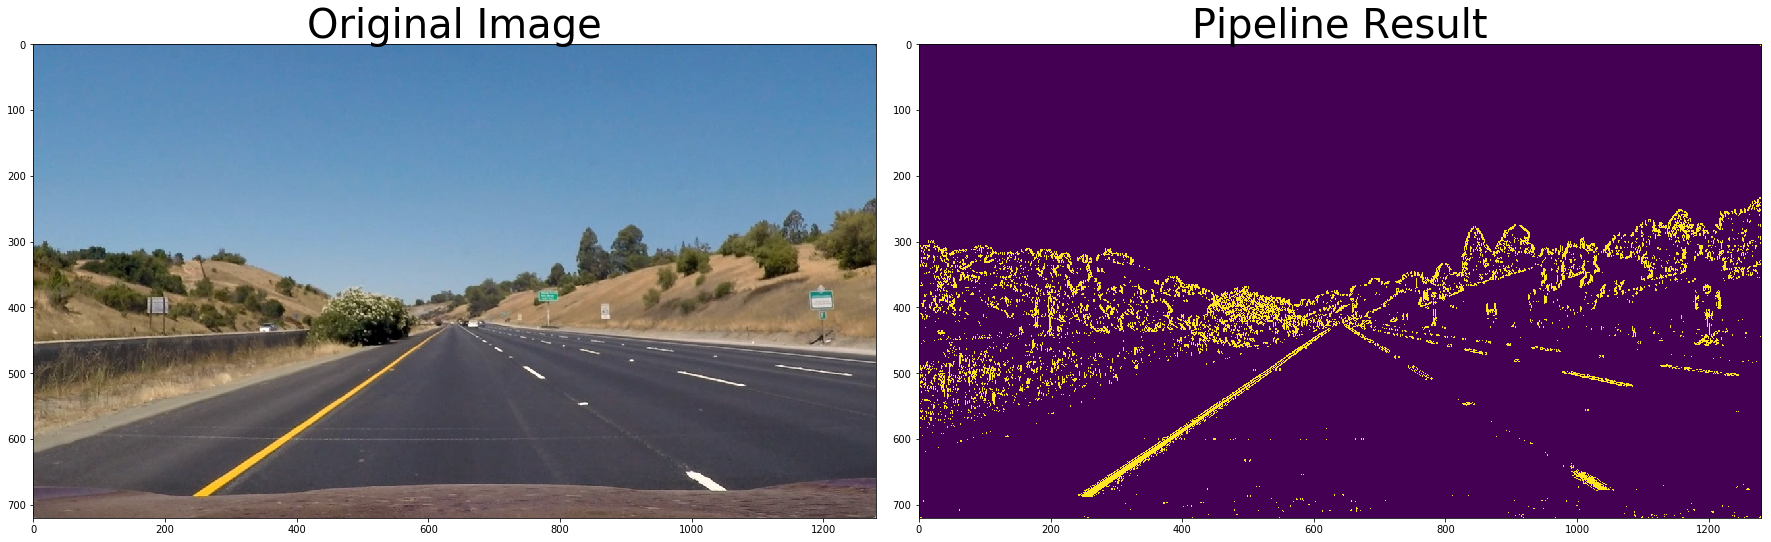

In [187]:
image = mpimg.imread('test_images/straight_lines1.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

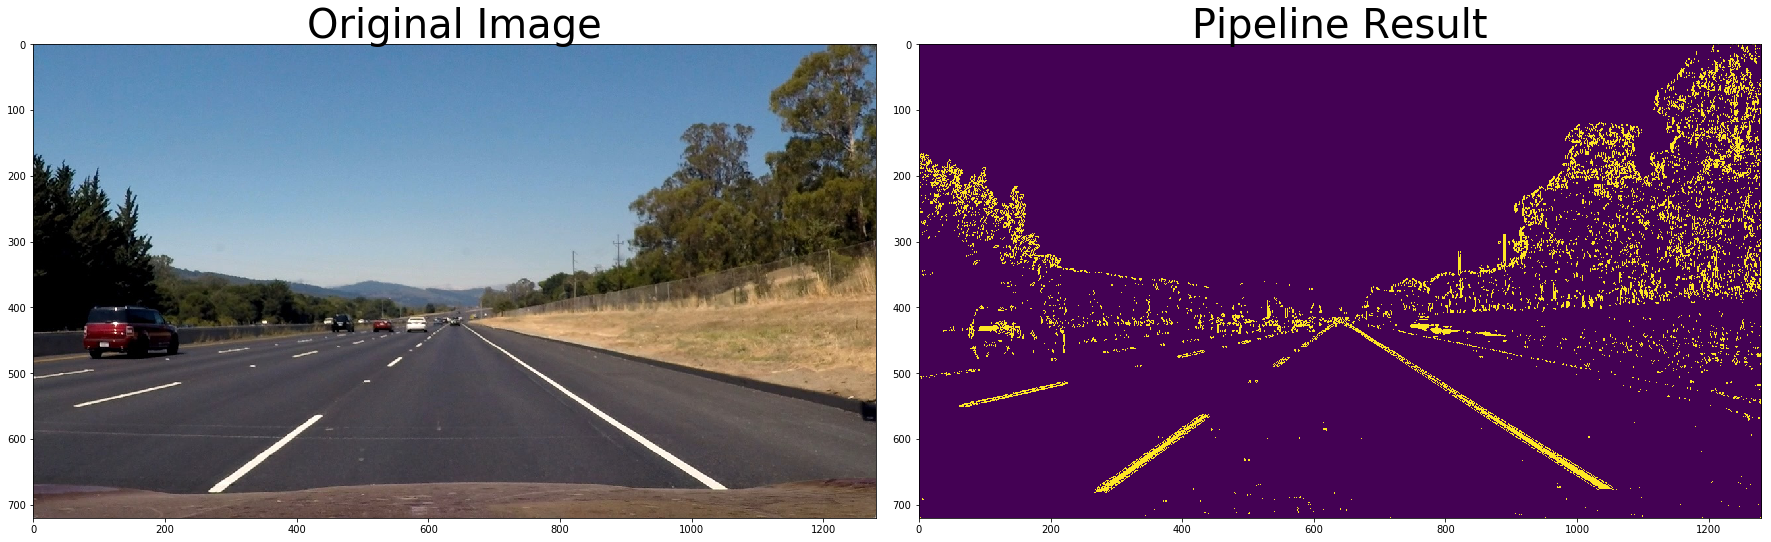

In [188]:
image = mpimg.imread('test_images/straight_lines2.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

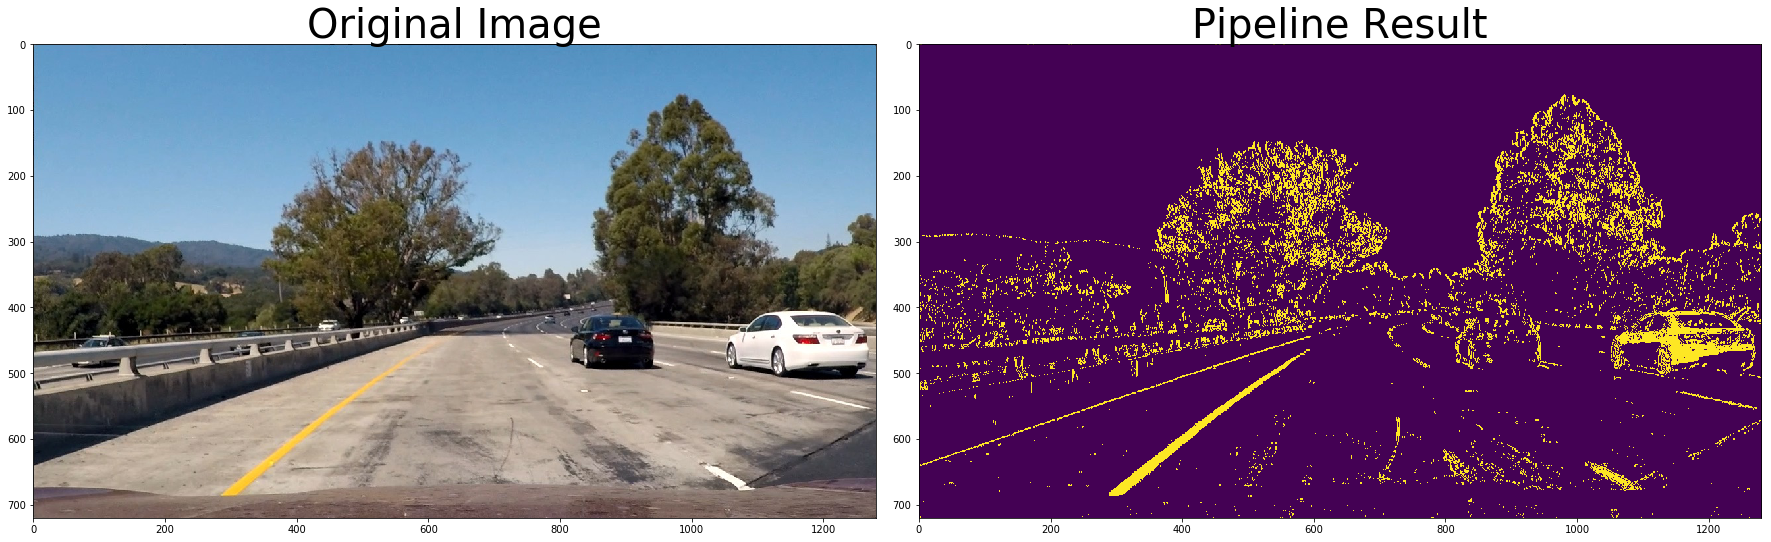

In [189]:
image = mpimg.imread('test_images/test1.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

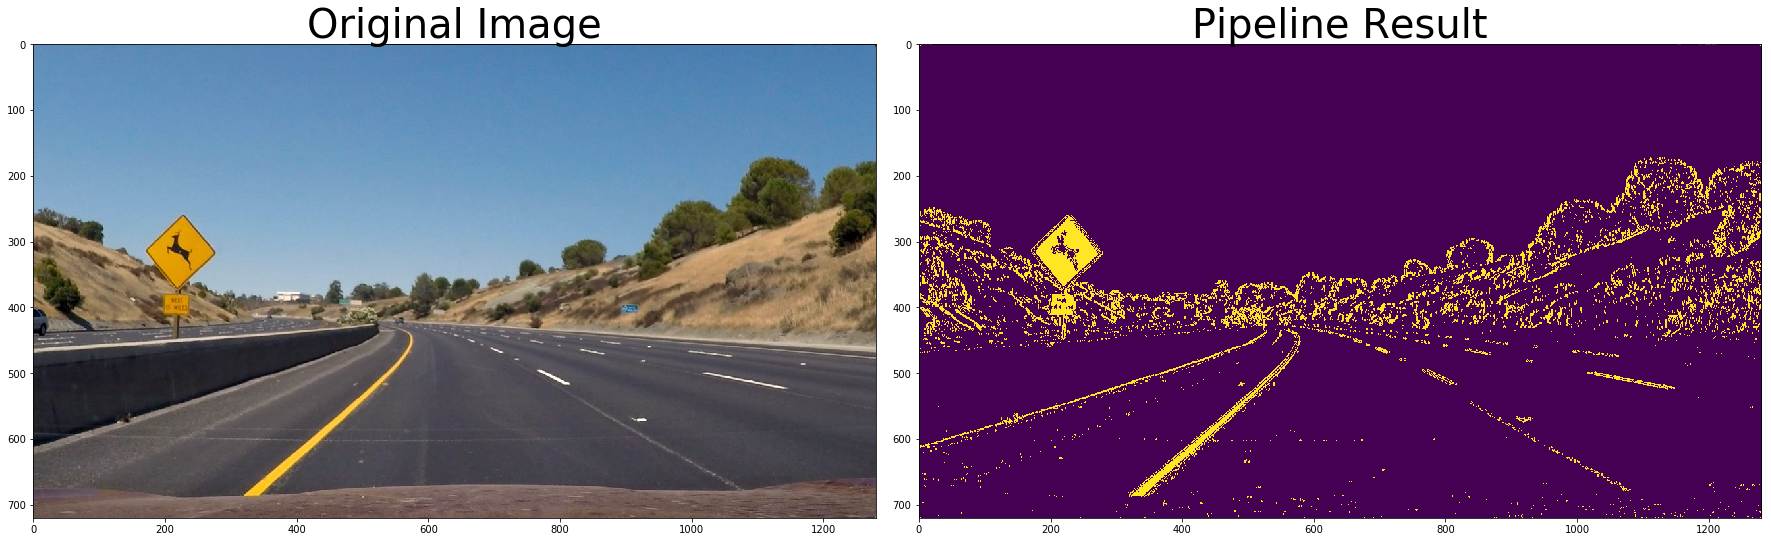

In [190]:
image = mpimg.imread('test_images/test2.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

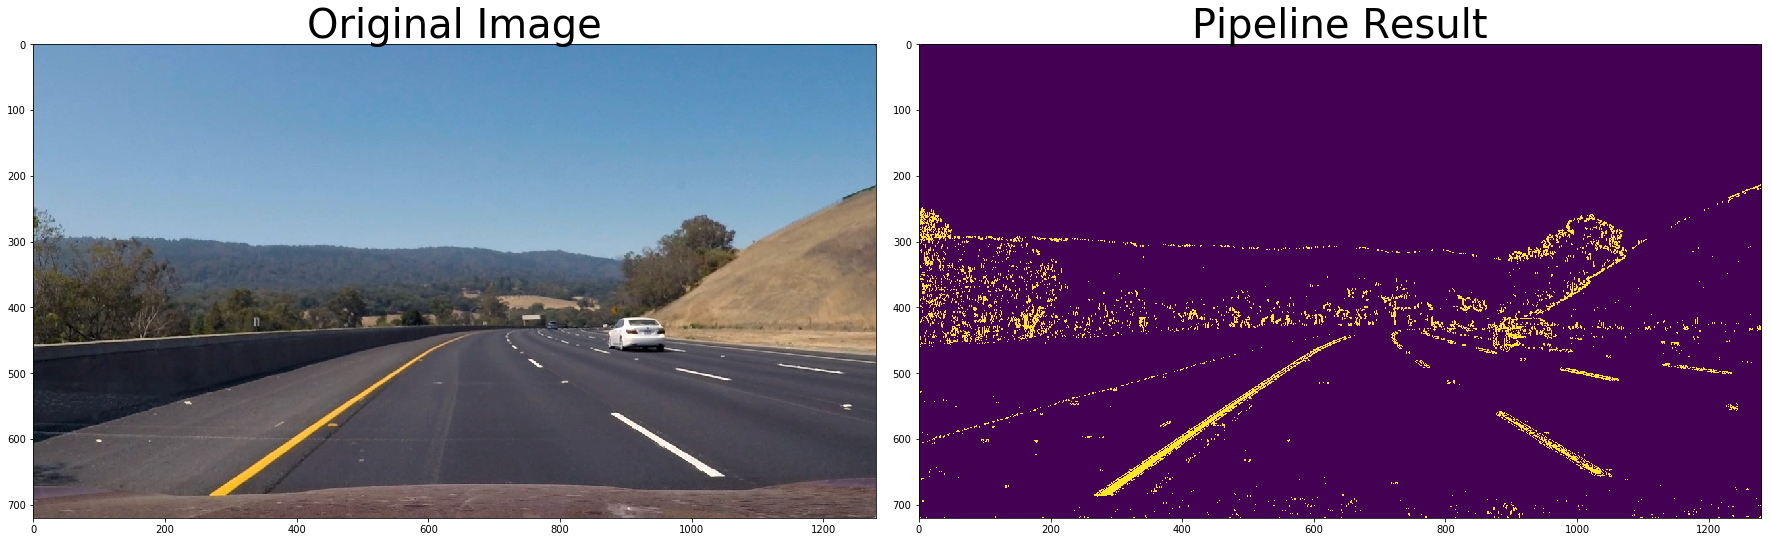

In [191]:
image = mpimg.imread('test_images/test3.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

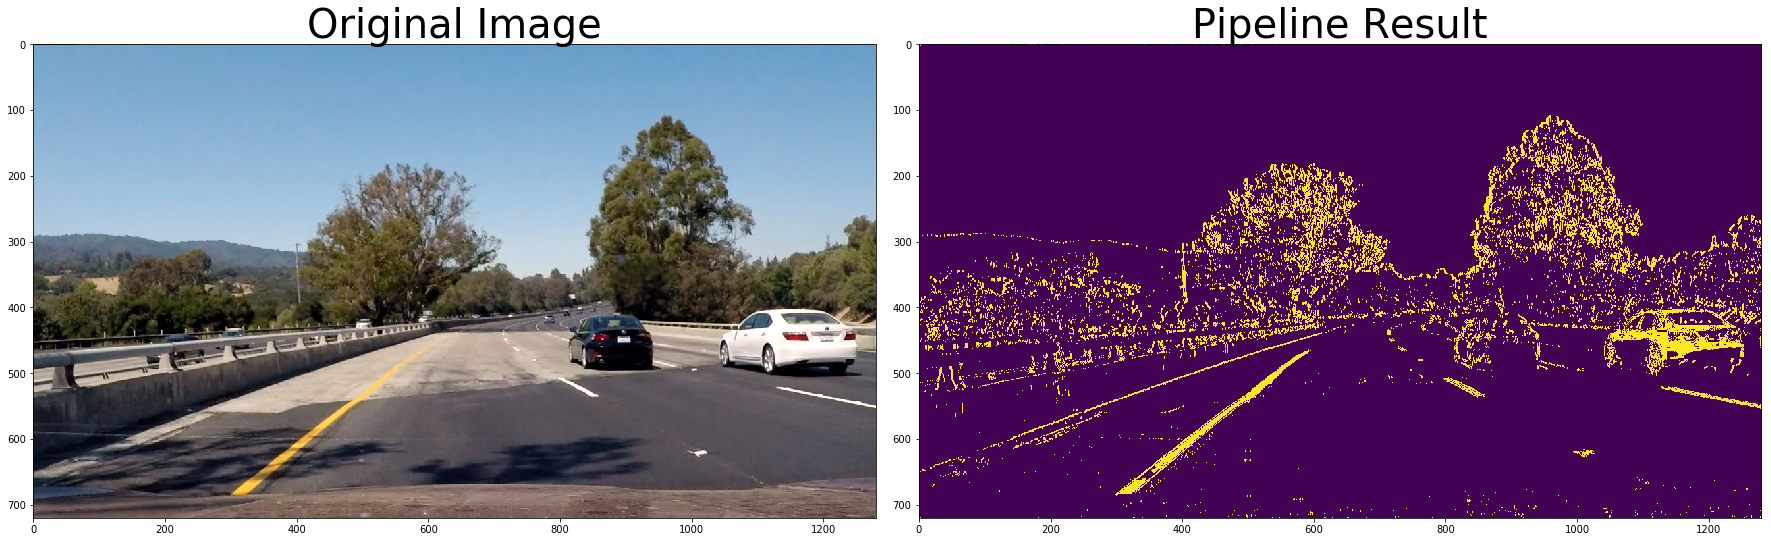

In [192]:
image = mpimg.imread('test_images/test4.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

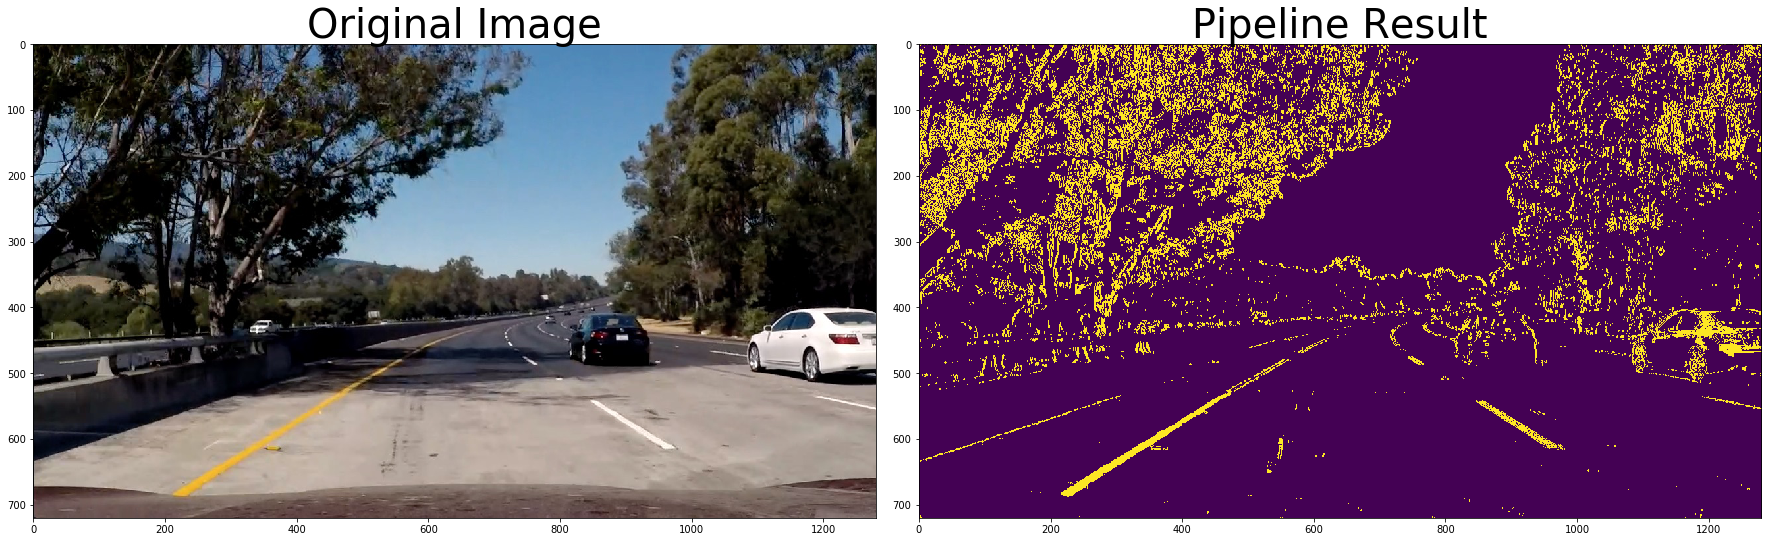

In [193]:
image = mpimg.imread('test_images/test5.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

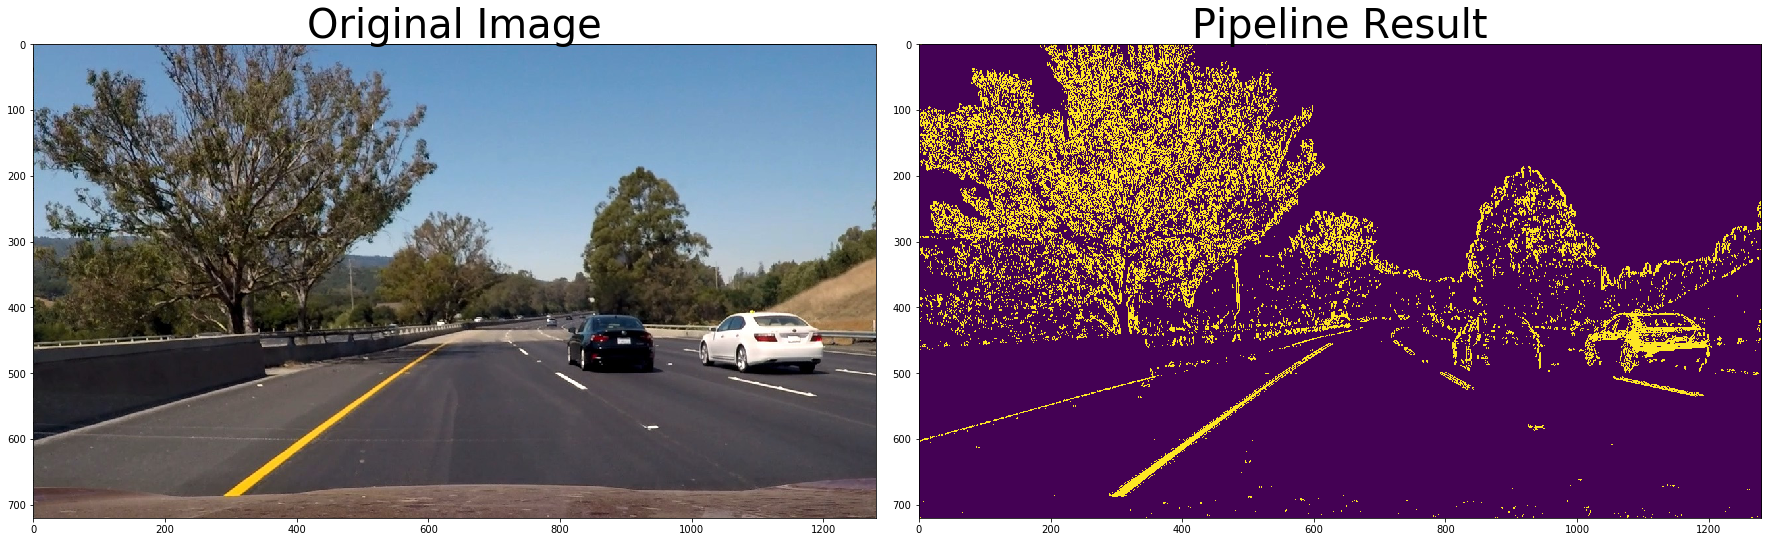

In [194]:
image = mpimg.imread('test_images/test6.jpg')
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Part 4 : Apply a perspective transform to rectify binary image ("birds-eye view").

In [195]:
def roi(image):
    mask = np.zeros_like(image)
    imshape = image.shape
    if len(imshape) > 2:
        channel_count = imshape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    vertices = np.array([[(100,720),(640, 360), (1180,720)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    
    return masked_image

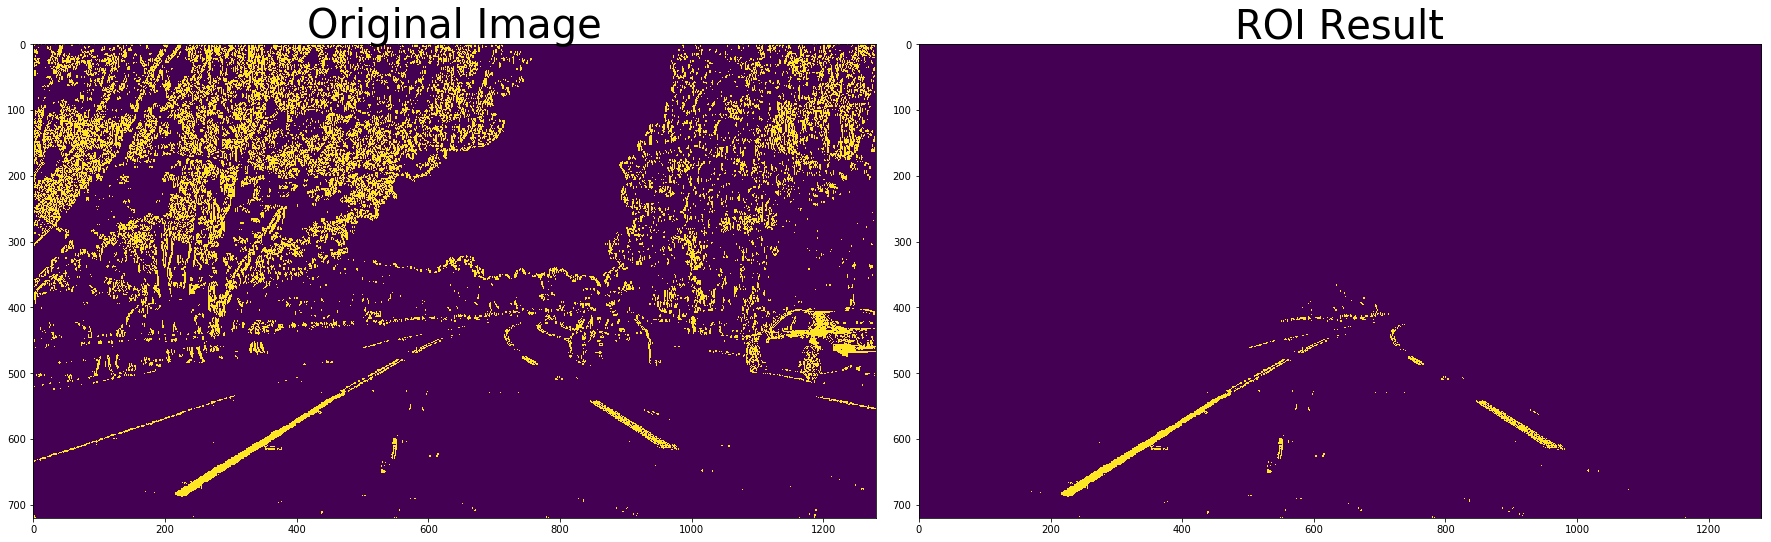

In [196]:
image = mpimg.imread('test_images/test5.jpg')
result = pipeline(image)
image_roi = roi(result)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(result)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(image_roi)
ax2.set_title('ROI Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [244]:
def perspective_transform(image, reverse=False):
    imshape = image.shape
    src = np.float32([[(200,720),(600, 447),(679, 447), (1100,720)]])
    
    dst = np.float32([[300,720],[300,0],[900,0],[900,720]])
    if reverse:
        M = cv2.getPerspectiveTransform(dst, src)
    else:
        M = cv2.getPerspectiveTransform(src, dst)
    img_size = (imshape[1], imshape[0])
    
    return cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)

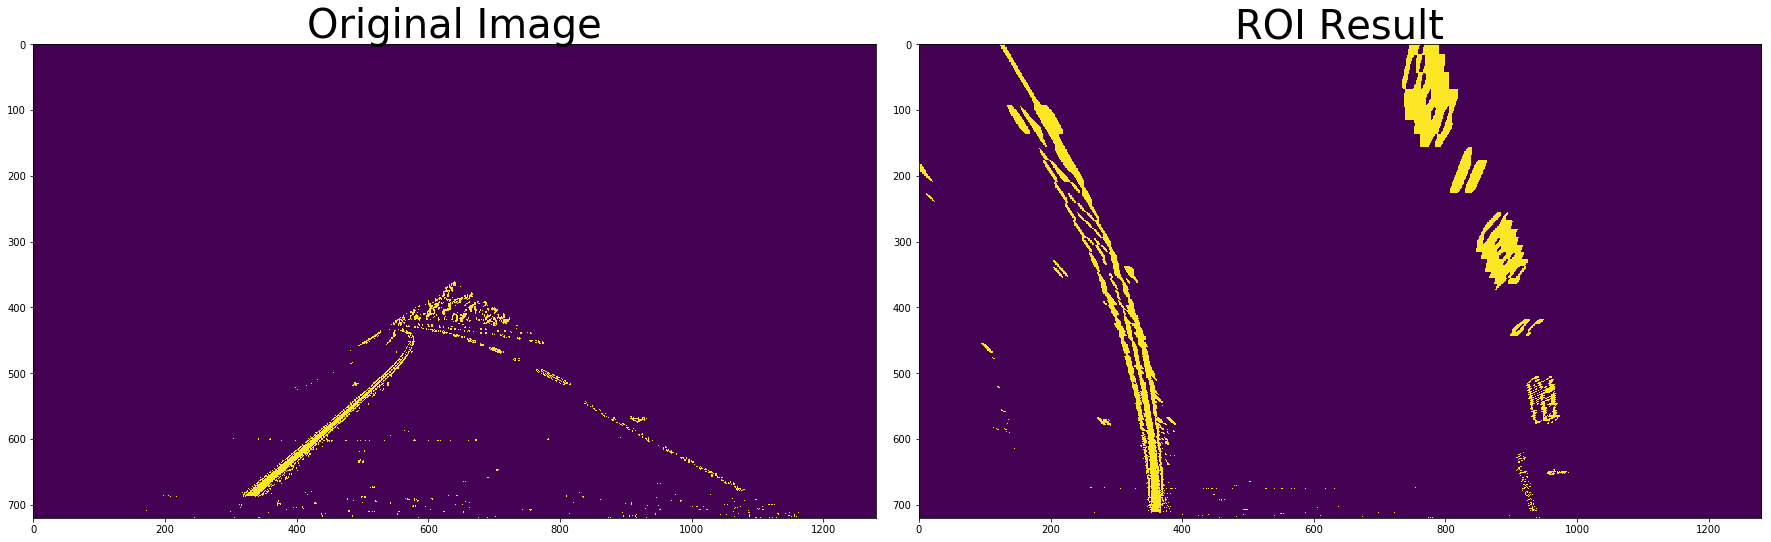

In [245]:
image = mpimg.imread('test_images/test2.jpg')
result = pipeline(image)
image_roi = roi(result)

warped = perspective_transform(image_roi, False)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image_roi)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped)
ax2.set_title('ROI Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Part 5: Detect lane pixels and fit to find the lane boundary

In [246]:
def hist(image):
    return np.sum(image[image.shape[0]//2:, :], axis=0)

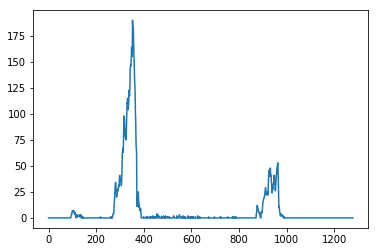

In [247]:
histogram = hist(warped)
plt.plot(histogram)
plt.show()

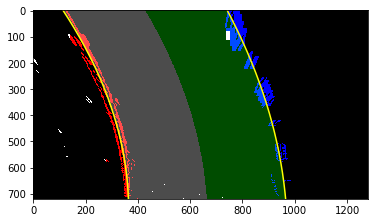

In [276]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = hist(binary_warped)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 20

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        #cv2.rectangle(out_img, (win_xleft_low,win_y_low), (win_xleft_high,win_y_high), (0,255,0), 2) 
        #cv2.rectangle(out_img, (win_xright_low,win_y_low), (win_xright_high,win_y_high), (0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
        
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    marginx = (right_fitx-left_fitx)/2
    
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+marginx,ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-marginx, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx,ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (255,255, 255))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result, left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result, left_fitx, right_fitx = find_lane_pixels(warped)

# View your output
plt.imshow(result)
plt.show()

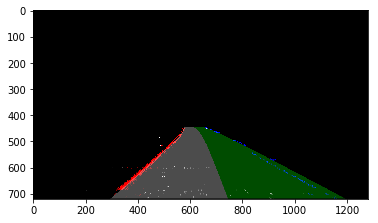

In [277]:
check = perspective_transform(result, True)

plt.imshow(check)
plt.show()

In [278]:
output = cv2.addWeighted(image, 1, check, 1, 0)

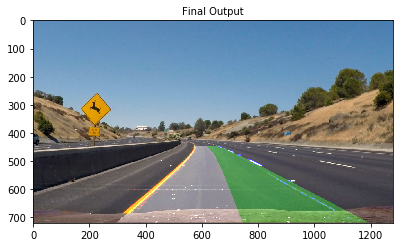

In [279]:
f, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
f.tight_layout()
ax1.imshow(output)
ax1.set_title('Final Output', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [280]:
def measure_curvature(leftx, rightx):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    ploty = np.linspace(0, 719, num=720)
    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    y_eval = np.max(ploty)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / (np.absolute(2*left_fit_cr[0]))  ## Implement the calculation of the left line here
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / (np.absolute(2*right_fit_cr[0]))
    
    z = np.mean([left_curverad, right_curverad])
    
    return z

In [281]:
left_fitx

array([114.55716758, 115.21310722, 115.86818546, 116.52240229,
       117.17575771, 117.82825172, 118.47988432, 119.13065552,
       119.7805653 , 120.42961368, 121.07780065, 121.72512621,
       122.37159037, 123.01719311, 123.66193445, 124.30581438,
       124.9488329 , 125.59099001, 126.23228571, 126.87272001,
       127.51229289, 128.15100437, 128.78885444, 129.4258431 ,
       130.06197036, 130.6972362 , 131.33164064, 131.96518367,
       132.59786529, 133.2296855 , 133.86064431, 134.4907417 ,
       135.11997769, 135.74835227, 136.37586544, 137.0025172 ,
       137.62830755, 138.2532365 , 138.87730404, 139.50051017,
       140.12285489, 140.7443382 , 141.3649601 , 141.9847206 ,
       142.60361969, 143.22165737, 143.83883364, 144.4551485 ,
       145.07060195, 145.685194  , 146.29892464, 146.91179387,
       147.52380169, 148.1349481 , 148.7452331 , 149.3546567 ,
       149.96321889, 150.57091967, 151.17775904, 151.783737  ,
       152.38885356, 152.9931087 , 153.59650244, 154.19

In [282]:
print(measure_curvature(left_fitx, right_fitx))

460.5623982116619
